## In this project I will be training a neural network for classifying imdb reviews for movies as good or bad


In [1]:
g = open('reviews.txt','r')
reviews = list(map(lambda x : x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r')
labels = list(map(lambda x : x[:-1].upper(),g.readlines()))
g.close()

In [2]:
def pretty_print_review_and_label(index):
    print(labels[index]+ "\t : \t"+ reviews[index][:80]+"...")
    
for i in range(20):
    
    pretty_print_review_and_label(i)

POSITIVE	 : 	bromwell high is a cartoon comedy . it ran at the same time as some other progra...
NEGATIVE	 : 	story of a man who has unnatural feelings for a pig . starts out with a opening ...
POSITIVE	 : 	homelessness  or houselessness as george carlin stated  has been an issue for ye...
NEGATIVE	 : 	airport    starts as a brand new luxury    plane is loaded up with valuable pain...
POSITIVE	 : 	brilliant over  acting by lesley ann warren . best dramatic hobo lady i have eve...
NEGATIVE	 : 	this film lacked something i couldn  t put my finger on at first charisma on the...
POSITIVE	 : 	this is easily the most underrated film inn the brooks cannon . sure  its flawed...
NEGATIVE	 : 	sorry everyone    i know this is supposed to be an  art  film   but wow  they sh...
POSITIVE	 : 	this is not the typical mel brooks film . it was much less slapstick than most o...
NEGATIVE	 : 	when i was little my parents took me along to the theater to see interiors . it ...
POSITIVE	 : 	this isn  t the c

In [3]:
from collections import Counter
import numpy as np

In [4]:
positive_counts = Counter()# to count the frequency of each word in positve review
negative_counts = Counter()#to count the frequency of each word in positve review
total_counts = Counter() #to maintain total count of each word in the review

In [5]:
for i in range(len(reviews)):
    if(labels[i]=="POSITIVE"):
        for word in reviews[i].split(" "):
            positive_counts[word]+=1
            total_counts[word]+=1
    else:
        for word in reviews[i].split(" "):
            negative_counts[word]+=1
            total_counts[word]+=1

In [8]:
positive_counts.most_common(10)

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235)]

In [9]:
negative_counts.most_common(10)

[('', 561462),
 ('.', 167538),
 ('the', 163389),
 ('a', 79321),
 ('and', 74385),
 ('of', 69009),
 ('to', 68974),
 ('br', 52637),
 ('is', 50083),
 ('it', 48327)]

In [10]:
pos_neg_ratios = Counter()

for term, count in list(total_counts.most_common()):
    if(count> 10):
        pos_neg_ratio = positive_counts[term]/float(negative_counts[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio
for word, ratio in pos_neg_ratios.most_common():
    if(ratio > 1):
        pos_neg_ratios[word] = np.log(ratio)
    else:
        pos_neg_ratios[word] = -np.log((1 / (ratio+0.01)))

In [11]:
pos_neg_ratios.most_common(10)

[('edie', 4.6913478822291435),
 ('antwone', 4.4773368144782069),
 ('din', 4.4067192472642533),
 ('gunga', 4.1896547420264252),
 ('goldsworthy', 4.1743872698956368),
 ('gypo', 4.0943445622221004),
 ('yokai', 4.0943445622221004),
 ('paulie', 4.0775374439057197),
 ('flavia', 3.9318256327243257),
 ('visconti', 3.9318256327243257)]

#Tokenizing words of the reviews and labels.


In [12]:
vocab = set(total_counts.keys())
vocab_size = len(vocab)

print(vocab_size)

74074


In [13]:
import numpy as np
layer_0 = np.zeros((1,vocab_size))
layer_0

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [14]:
word2index = { } 
for index,word in enumerate(vocab):
    word2index[word] = index
list(word2index.keys())[:20]

['',
 'appelagate',
 'inskip',
 'horshack',
 'hypothse',
 'fluidity',
 'sos',
 'rouses',
 'hanger',
 'nervy',
 'bronston',
 'hemet',
 'apodictic',
 'jal',
 'guys',
 'comebacks',
 'worhol',
 'carve',
 'agonized',
 'gunfight']

In [15]:
def update_input_layer(review):
    global layer_0 
    layer_0*=0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1
update_input_layer(reviews[0])

In [16]:
def get_target_for_label(label):
    if(label == 'POSITIVE'):
        return 1
    else: 
        return 0

Building the Neural Network

In [17]:
# Quick numpy.random.normal tutorial:
# np.random.normal(mean, std_deviation, size) creates an array with elements in normal distribution.
mu,sigma = 10,0.1
s = np.random.normal(mu,sigma,size=100000)
#print(s)

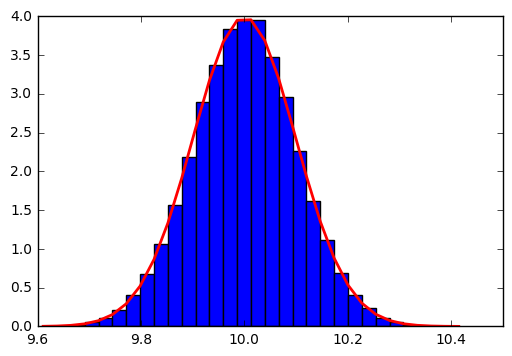

In [18]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()

In [19]:
import time
import sys
import numpy as np
# Tweaking our network from before to model these phenomena
class NeuralNetwork():
    def __init__(self,reviews,labels,hidden_nodes = 10, learning_rate = 0.01):
        #set our random number generator
        np.random.seed(1)
        # calling preprocess_data function
        self.preprocess_data(reviews, labels)
        
        self.initialize_network(len(self.review_vocab),hidden_nodes,1,learning_rate)
        
    
    def preprocess_data(self,reviews, labels):
        # creating a set of words from all the reviews.
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        #exporting the set created above as a list variable that is a class variable.        
        self.review_vocab = list(review_vocab)
        
        # similar to the above procedure, we will now create a set of labels and export it to 
        # self.label_vocab class variable
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        self.label_vocab = list(label_vocab)
        
        # size of the review vocabulary 
        self.review_vocab_size = len(self.review_vocab)
        
        # size of the label vocabulary
        self.label_vocab_size = len(self.label_vocab)
        
        # creating a dictionary with words and mapping them to numbers
        self.word2index = {}
        for word, index in enumerate(self.review_vocab):
            self.word2index[word] = index
        
        # creating a dictionary with labels and mapping them to numbers. 
        self.label2index = { }
        for label, index in enumerate(self.label_vocab):
            self.label2index [label] = index
                
        
    def initialize_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5,
                                            (self.hidden_nodes, self.output_nodes))
        
        self.learning_rate = learning_rate
        
        self.layer_0 = np.zeros((1,input_nodes))
    
    def update_input_layer(self,review): #--> resets the input layer for each review. 
         # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(" "):
            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] += 1
    
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def train(self,training_reviews, training_labels):
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        
        start = time.time()
        for i in range(len(training_reviews)):
            review = training_reviews[i]
            label = training_labels[i]
            
            ## forward pass
            
            #input layer 
            self.update_input_layer(review)
            
            #hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)
            
            #output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
            
            ### Backward Pass:
            # output error
            layer_2_error = layer_2 - self.get_target_for_label(label)
            layer_2_delta = layer_2_error # no non-linearity. So, its the same as the error. 
            
            #backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T)# errors propagated to the hidden layer
            layer_1_delta = layer_1_error # no non linearity
            
            # weights update: 
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate #update hidden weights
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta)* self.learning_rate
            
            if(np.abs(layer_2_error)< 0.5):
                correct_so_far+=1
            reviews_per_second = i/ float(time.time() - start)
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + 
                             "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + " #Correct:"
                             + str(correct_so_far) + " #Trained:" + str(i+1) + " Training Accuracy:"
                             + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            
                   
            if(i % 2500 == 0):
                print("")
                
    def test(self, testing_reviews, testing_labels):
    
        correct = 0
    
        start = time.time()
    
        for i in range(len(testing_reviews)):
            
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
        
            reviews_per_second = i / float(time.time() - start)
        
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                         + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                        + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
        
    def run(self, review):
        
        # Input Layer
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"

In [24]:
mlp = NeuralNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.01)

In [25]:
# evaluate our model before training (just to show how horrible it is)
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):1333.% #Correct:500 #Tested:1000 Testing Accuracy:50.0%

In [ ]:
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):190.3 #Correct:0 #Trained:2501 Training Accuracy:0.0%
Progress:20.8% Speed(reviews/sec):183.7 #Correct:0 #Trained:5001 Training Accuracy:0.0%
Progress:31.2% Speed(reviews/sec):188.0 #Correct:0 #Trained:7501 Training Accuracy:0.0%
Progress:41.6% Speed(reviews/sec):187.3 #Correct:0 #Trained:10001 Training Accuracy:0.0%
Progress:51.8% Speed(reviews/sec):184.1 #Correct:0 #Trained:12449 Training Accuracy:0.0%

In [25]:
mlp.test(reviews[-1000:-2000],labels[-1000:-2000])